# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution]: strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley] от значения параметра. 

Подробнее о результате выдачи [тут].

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.4408920985006262e-16
 message: 'Optimization terminated successfully.'
    nfev: 2673
     nit: 86
 success: True
       x: array([ 0.,  0.])

In [43]:
# Проверяем количество итераций при различных значениях параметра strategy
strategy_name = ['best1bin','best1exp','rand1bin','rand1exp','rand2bin','rand2exp','randtobest1bin',
                 'randtobest1exp','best2exp','best2bin']
res1 = {}
for i in strategy_name:
    result = differential_evolution(ackley, bounds, seed=42, strategy=i)
    res1[i] = result.nit
res1

{'best1bin': 86,
 'best1exp': 132,
 'best2bin': 152,
 'best2exp': 228,
 'rand1bin': 157,
 'rand1exp': 232,
 'rand2bin': 217,
 'rand2exp': 331,
 'randtobest1bin': 108,
 'randtobest1exp': 158}

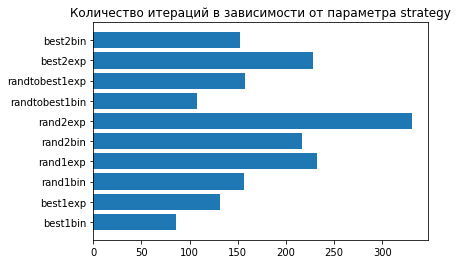

In [45]:
names = list(res1.keys())
nit = list(res1.values())
plt.barh(range(len(res1)),nit,tick_label=names)
plt.title('Количество итераций в зависимости от параметра strategy')
plt.show()

Лучший результат на функции Экли показывает стратегия по умолчанию best1bin.

In [63]:
# Проверяем количество итераций при различных значениях параметра popsize
res2 = {}
for i in range(10,30):
    result = differential_evolution(ackley, bounds, seed=42, popsize=i)
    res2[i] = result.nit
res2

{10: 91,
 11: 90,
 12: 92,
 13: 96,
 14: 90,
 15: 86,
 16: 94,
 17: 85,
 18: 94,
 19: 89,
 20: 93,
 21: 91,
 22: 97,
 23: 92,
 24: 88,
 25: 96,
 26: 90,
 27: 93,
 28: 92,
 29: 96}

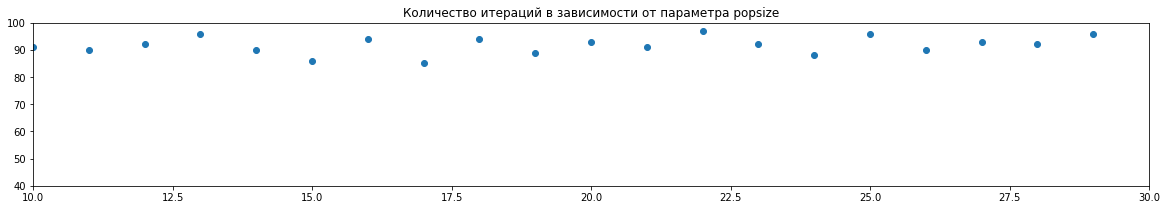

In [66]:
x = list(res2.keys())
y = list(res2.values())
plt.figure(figsize=(20,3))
plt.scatter(x,y)
plt.axis([10,30,40,100])
plt.title('Количество итераций в зависимости от параметра popsize')
plt.show()

Размер популяции практически не влияет на количество итераций.

In [91]:
# Проверяем количество итераций при различных значениях параметра mutation
res3 = {}
for i in range(0,40):
    result = differential_evolution(ackley, bounds, seed=42, mutation=i/20)
    res3[i/20] = result.nit
res3

{0.0: 3,
 0.05: 5,
 0.1: 5,
 0.15: 27,
 0.2: 29,
 0.25: 32,
 0.3: 37,
 0.35: 45,
 0.4: 46,
 0.45: 51,
 0.5: 57,
 0.55: 62,
 0.6: 69,
 0.65: 80,
 0.7: 88,
 0.75: 99,
 0.8: 104,
 0.85: 116,
 0.9: 115,
 0.95: 130,
 1.0: 47,
 1.05: 164,
 1.1: 174,
 1.15: 183,
 1.2: 170,
 1.25: 195,
 1.3: 201,
 1.35: 230,
 1.4: 233,
 1.45: 53,
 1.5: 245,
 1.55: 25,
 1.6: 146,
 1.65: 91,
 1.7: 182,
 1.75: 98,
 1.8: 86,
 1.85: 102,
 1.9: 317,
 1.95: 141}

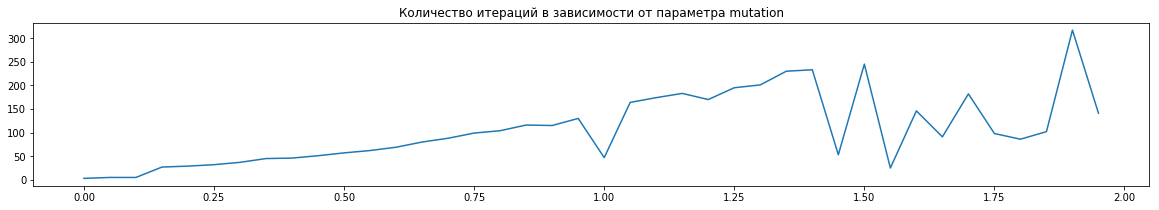

In [92]:
x = list(res3.keys())
y = list(res3.values())
plt.figure(figsize=(20,3))
plt.plot(x,y)
#plt.axis([10,30,40,100])
plt.title('Количество итераций в зависимости от параметра mutation')
plt.show()

Как и сказано в документации, с ростом количества мутаций растет количество итераций, но на функции Экли на значениях больше 1,4 появляются многочисленные единичные низкие значения при сохранении общей тенденции к росту.

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [4]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[  0.00000000e+00,   0.00000000e+00],
       [ -1.60675049e-05,  -8.45336914e-06],
       [ -1.40380859e-06,  -3.11279297e-05]]), array([  4.44089210e-16,   5.13604405e-05,   8.81584216e-05]))
           fun: 4.4408920985006262e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([ 0.,  0.])

In [17]:
# функция вычисления градиента в точке
def ackley_grad(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return np.array([-0.4*x[0]/(arg1+1.e-16)*np.exp(arg1) + np.pi*np.sin(2.*np.pi*x[0])*np.exp(arg2),
                  -0.4*x[1]/(arg1+1.e-16)*np.exp(arg1) + np.pi*np.sin(2.*np.pi*x[1])*np.exp(arg2)])

In [29]:
# Показатель количества итераций nit доступен не для всех методов,
# проверяем количество расчетов целевой функции 
method_name = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP']

res4 = {}
for i in method_name:
    result_m = minimize(ackley, x0,  method=i, jac=ackley_grad)
    res4[i] = [result_m.success,result_m.nfev,result_m.fun,result_m.x]
res4

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method COBYLA does not use gradient information (jac).
  RuntimeWarning)


{'BFGS': [True, 1, 4.4408920985006262e-16, array([ 0.,  0.])],
 'CG': [True, 1, 4.4408920985006262e-16, array([ 0.,  0.])],
 'COBYLA': [True,
  25,
  0.00028310899612238316,
  array([ -8.76258342e-06,   9.96153459e-05])],
 'L-BFGS-B': [True, 1, 4.4408920985006262e-16, array([ 0.,  0.])],
 'Nelder-Mead': [True, 17, 4.4408920985006262e-16, array([ 0.,  0.])],
 'Powell': [True, 63, 4.4408920985006262e-16, array([ 0.,  0.])],
 'SLSQP': [True, 1, 4.440892098500626e-16, array([ 0.,  0.])],
 'TNC': [True, 1, 4.4408920985006262e-16, array([ 0.,  0.])]}

Для начальной точки [0,0] алгоритмы, требующие расчета градиента, находят минимум за 1 проход.
Смещаем начальную точку:

In [32]:
x0 = [0.1,0.2]
res5 = {}
for i in method_name:
    result_m = minimize(ackley, x0,  method=i, jac=ackley_grad)
    res5[i] = [result_m.success,result_m.message,result_m.nfev,result_m.fun,result_m.x]
res5

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:381: RuntimeWarning: Method COBYLA does not use gradient information (jac).
  RuntimeWarning)


{'BFGS': [False,
  'Desired error not necessarily achieved due to precision loss.',
  176,
  3.9968028886505635e-15,
  array([  6.48854730e-16,  -1.35569905e-15])],
 'CG': [False,
  'Desired error not necessarily achieved due to precision loss.',
  167,
  3.9968028886505635e-15,
  array([ -7.89396193e-16,   1.21142049e-15])],
 'COBYLA': [True,
  'Optimization terminated successfully.',
  42,
  0.00028809875895108306,
  array([ -7.78558772e-05,  -6.55265092e-05])],
 'L-BFGS-B': [True,
  b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  52,
  1.8461148165727082e-09,
  array([  4.90898888e-10,   4.30158142e-10])],
 'Nelder-Mead': [True,
  'Optimization terminated successfully.',
  71,
  9.0843248255811915e-05,
  array([  3.08556187e-05,  -8.88084450e-06])],
 'Powell': [True,
  'Optimization terminated successfully.',
  259,
  1.1013856493491403e-11,
  array([ -3.88812445e-12,  -2.17105038e-13])],
 'SLSQP': [True,
  'Optimization terminated successfully.',
  40,
  1.0932066847324506e-0

Алгоритмы BFGS и CG с задачей не справились.
Меньше всего проходов выполнили алгоритмы SLSQP и COBYLA.
Лучшую точность показал Powell.
L-BFGS-B показал хорошую точность при высокой скорости работы.

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
